In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
import pqr

In [3]:
prices = pd.read_excel('factors/russia/monthlyprice.xlsx', parse_dates=True, index_col=0).astype(float)
pe = pd.read_excel('factors/russia/PE.xlsx', parse_dates=True, index_col=0).astype(float)
volume = pd.read_excel('factors/russia/betafilter.xlsx', parse_dates=True, index_col=0).astype(float)

In [4]:
prices = prices.replace(0, np.nan)
pe = pe.replace(0, np.nan)
volume = volume.replace(0, np.nan)

In [5]:
value = pqr.Factor(pe).look_back(3).hold(3)

liquidity = pqr.Factor(volume).look_back(1)
liquidity_filter = liquidity >= 10_000_000

value.filter(liquidity_filter)

In [6]:
benchmark = pqr.Benchmark().from_stock_universe(prices, liquidity_filter)

In [7]:
portfolios = pqr.fit_factor_model(prices, value, better='less')

/home/akbabkin/programming/projects/pqr/venv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/akbabkin/programming/projects/pqr/venv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/akbabkin/programming/projects/pqr/venv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/akbabkin/programming/projects/pqr/venv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

,"q(0.00, 0.33)","q(0.33, 0.67)","q(0.67, 1.00)"
"Total Return, %",1310.59,302.13,439.81
"Annual Return, %",16.76,8.49,10.37
"Annual Volatility, %",26.42,28.42,27.11
"Mean Return, %",1.59,1.04,1.14
"Win Rate, %",59.51,59.02,56.59
"Volatility, %",7.63,8.20,7.82
"Maximum Drawdown, %",-66.77,-77.39,-74.19
"VaR, %",-9.37,-11.92,-10.69
"Expected Tail Loss, %",-15.06,-18.83,-16.43
Rachev Ratio,1.27,0.91,1.14


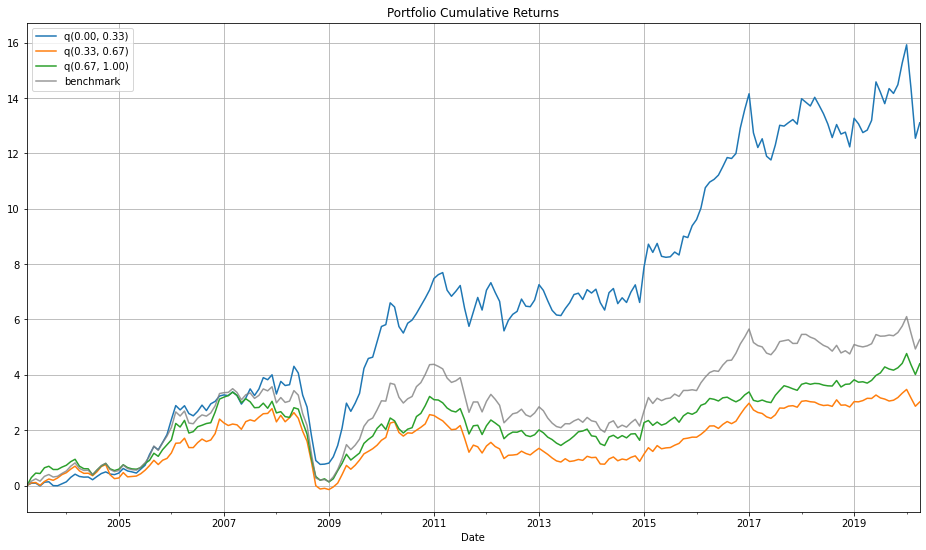

In [8]:
pqr.summary_tear_sheet(portfolios, benchmark)